In [1]:
#!pip install yellowbrick

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [3]:
df=pd.read_csv('data.csv')
df

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97995,97995,0.237591,1.657034,-0.689282,0.313710,-0.299039,0.329139,1.607378,5,7,...,-0.290116,-0.258141,-0.973640,1.369508,0.391055,2.152426,-0.208944,-1.475403,0.298448,0.445039
97996,97996,0.322696,0.710411,0.562625,-1.321713,-0.357708,0.182024,0.178558,3,9,...,0.117687,1.388242,0.342400,1.680537,-0.860409,0.579165,1.162692,0.134994,0.994666,0.727642
97997,97997,-0.249364,-0.459545,1.886122,-1.340310,0.195029,-0.559520,-0.379767,8,9,...,-0.850223,-1.787648,-1.268115,-1.508330,1.945622,1.503645,0.194968,2.142693,1.646042,0.641466
97998,97998,0.311408,2.185237,0.761367,0.436723,0.464967,0.062321,-0.334025,1,8,...,-0.010839,1.118906,1.565765,0.358480,0.547615,1.224439,-0.537998,-1.610954,-0.616227,-0.066211


# EDA

### For EDA, we will proceed with the steps below:

### Describe the Dataset Components: We will look into the distributions of the features using statistical summaries
### and visualizations.
### Check for Correlations: Identify if any features are strongly correlated with others.
### Data Cleaning: Look for any anomalies, such as missing values, outliers, or skewed information and treat the data.
### Feature Engineering: As there is 29 features, we might want to tackle the dimensionality issue,and see if we can conduct
### feature selection, extraction or reduction (although without contextual knowledge) to aid in subsequent modeling.

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      98000 non-null  int64  
 1   f_00    98000 non-null  float64
 2   f_01    98000 non-null  float64
 3   f_02    98000 non-null  float64
 4   f_03    98000 non-null  float64
 5   f_04    98000 non-null  float64
 6   f_05    98000 non-null  float64
 7   f_06    98000 non-null  float64
 8   f_07    98000 non-null  int64  
 9   f_08    98000 non-null  int64  
 10  f_09    98000 non-null  int64  
 11  f_10    98000 non-null  int64  
 12  f_11    98000 non-null  int64  
 13  f_12    98000 non-null  int64  
 14  f_13    98000 non-null  int64  
 15  f_14    98000 non-null  float64
 16  f_15    98000 non-null  float64
 17  f_16    98000 non-null  float64
 18  f_17    98000 non-null  float64
 19  f_18    98000 non-null  float64
 20  f_19    98000 non-null  float64
 21  f_20    98000 non-null  float64
 22

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


### From the initial inspection, the features have varying ranges, as indicated by the differences between their minimum
### and maximum values. This variation suggests that normalization or scaling may be necessary before performing clustering,
### as many clustering algorithms are sensitive to the scale of the data. The standard deviations suggest differing levels of
### variance in the features. Features with higher variance might be more influential in the clustering process

## Next, we will create histograms for each feature to understand their distributions.
## This visual approach will help identify if any features are skewed or have outliers.

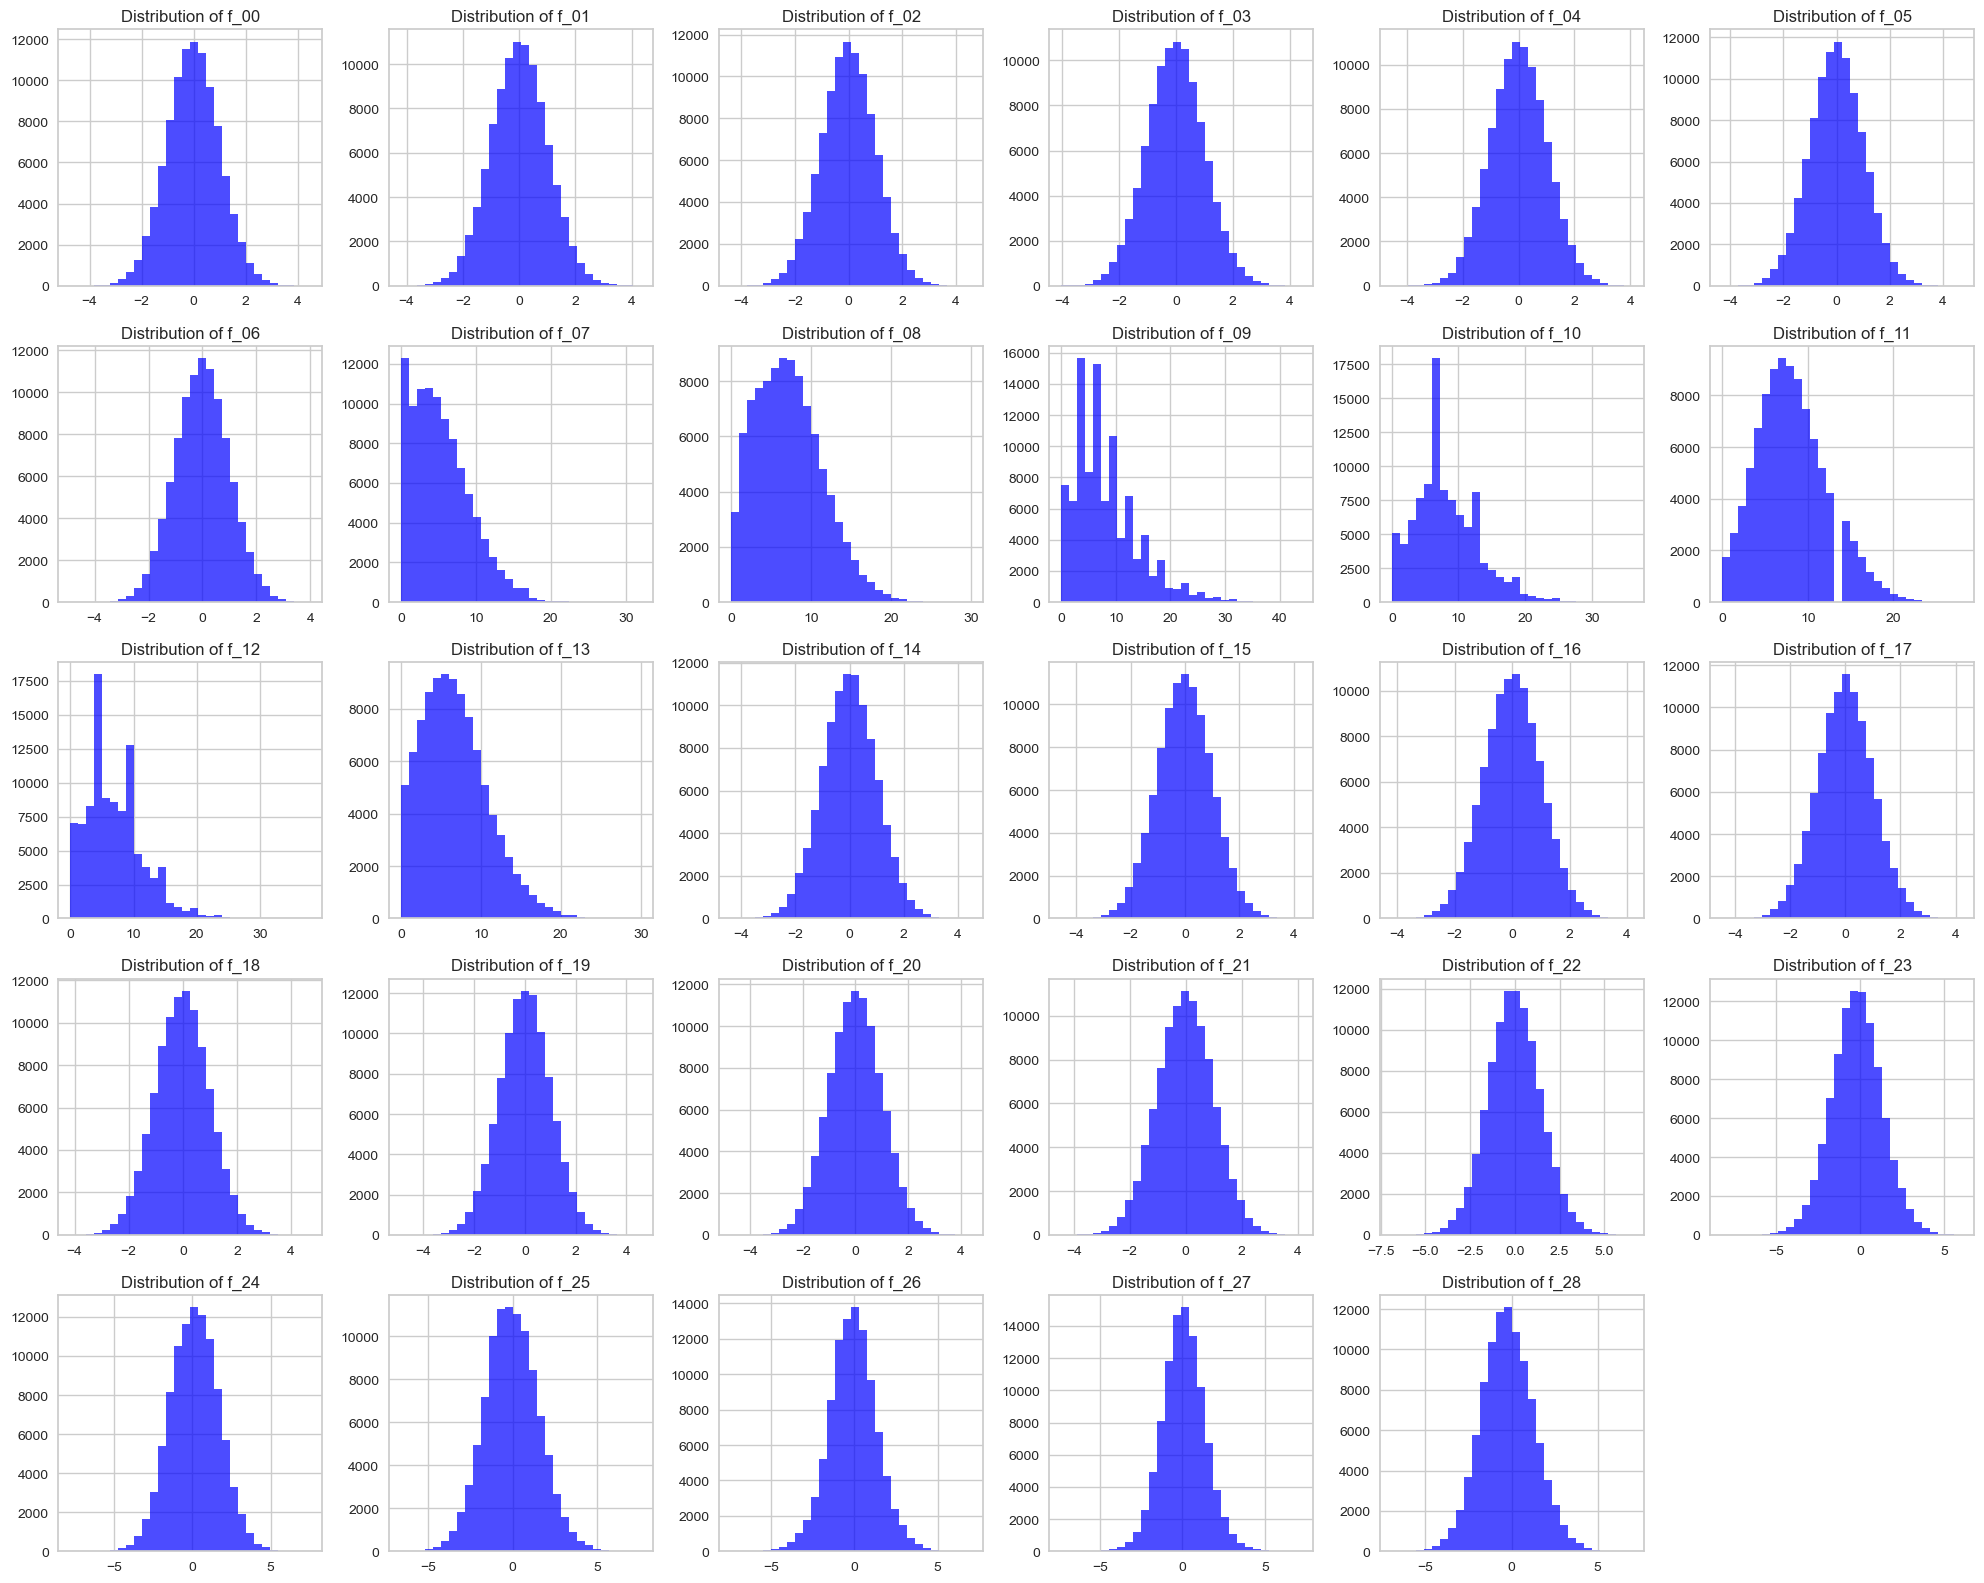

In [5]:
plt.figure(figsize=(20, 16))

for i in range(29):
    plt.subplot(5, 6, i + 1)
    plt.hist(df[f'f_{str(i).zfill(2)}'], bins=30, color='blue', alpha=0.7)
    plt.title(f'Distribution of f_{str(i).zfill(2)}')
    plt.tight_layout()

plt.show()

### The histograms provide a visual representation of each feature's distribution. 
### Here is what we can discern from these plots:

### Variety in Distributions: While most of the features appear to have relatively normal distribution, 
### some features like 'f_06' and 'f_07' seemed to have skewed distribution.

### Presence of Outliers: Some histograms like 'f_09' seems to have some potential outliers.
### These are visible in features with long tails, indicating values significantly higher or lower than the majority of
### the data.

### Different Ranges: The features have varying ranges (minimum and maximum values),
### which could affect algorithms sensitive to scale. For instance, 'f_04' has a broader range compared to 'f_22'.

### Clearly, the visual inspection suggest the need to delve deeper into outlier detection and formulate a strategy
### for potentially transforming the data for optimal results in subsequent clustering or predictive modeling. 
### But before we delve into that, we will examine the features deeper by creating a correlation matrix to see if any
### features are highly correlated.

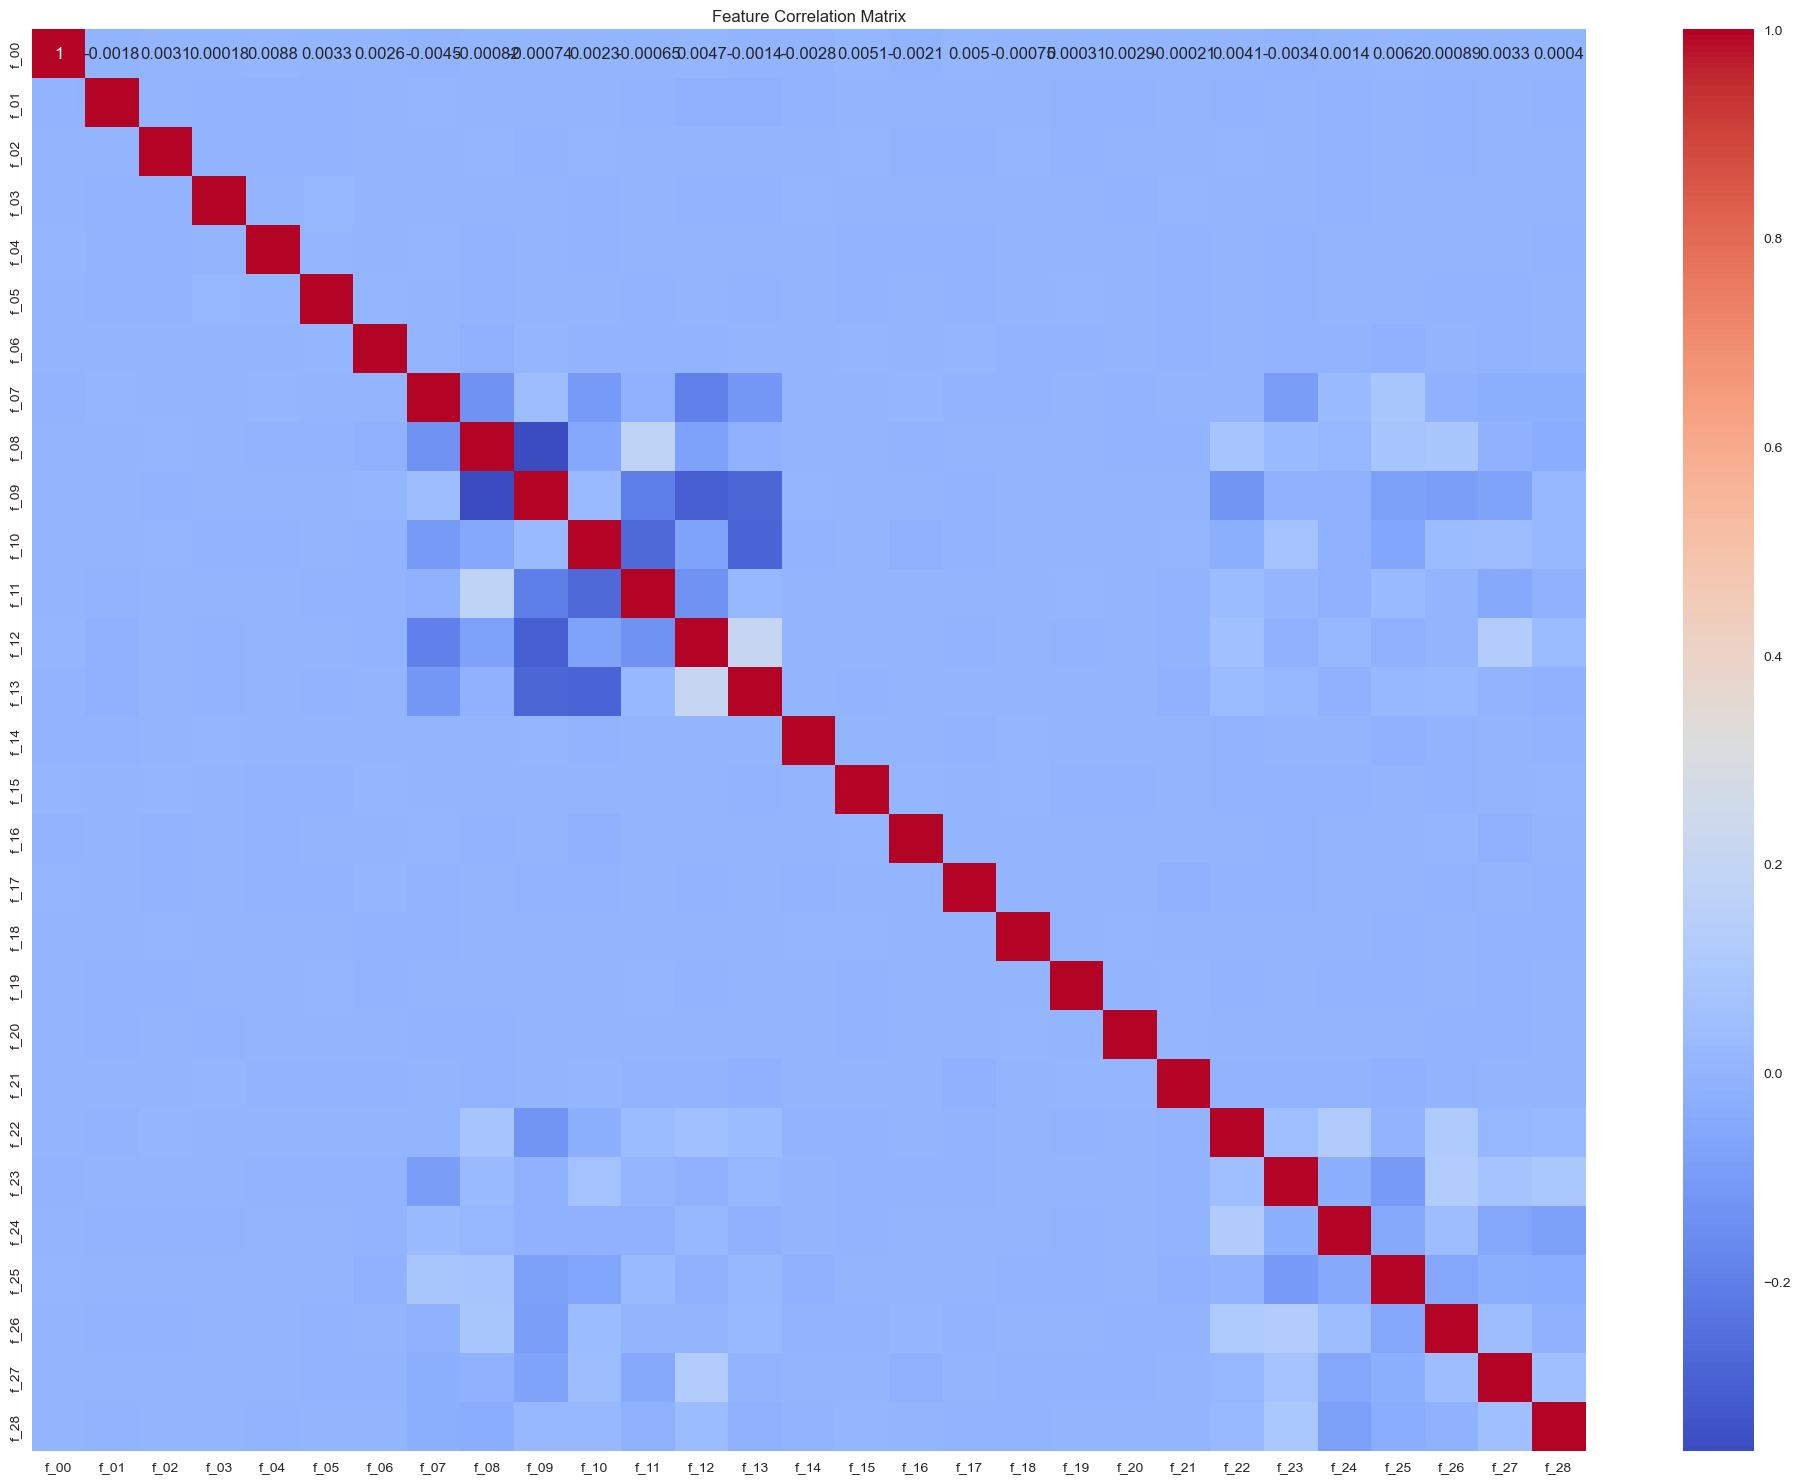

In [18]:
import seaborn as sns
correlation_matrix = df.drop(columns=['id']).corr()
plt.figure(figsize=(20,15))
sns.heatmap(correlation_matrix, annot = True ,cmap = 'coolwarm')
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

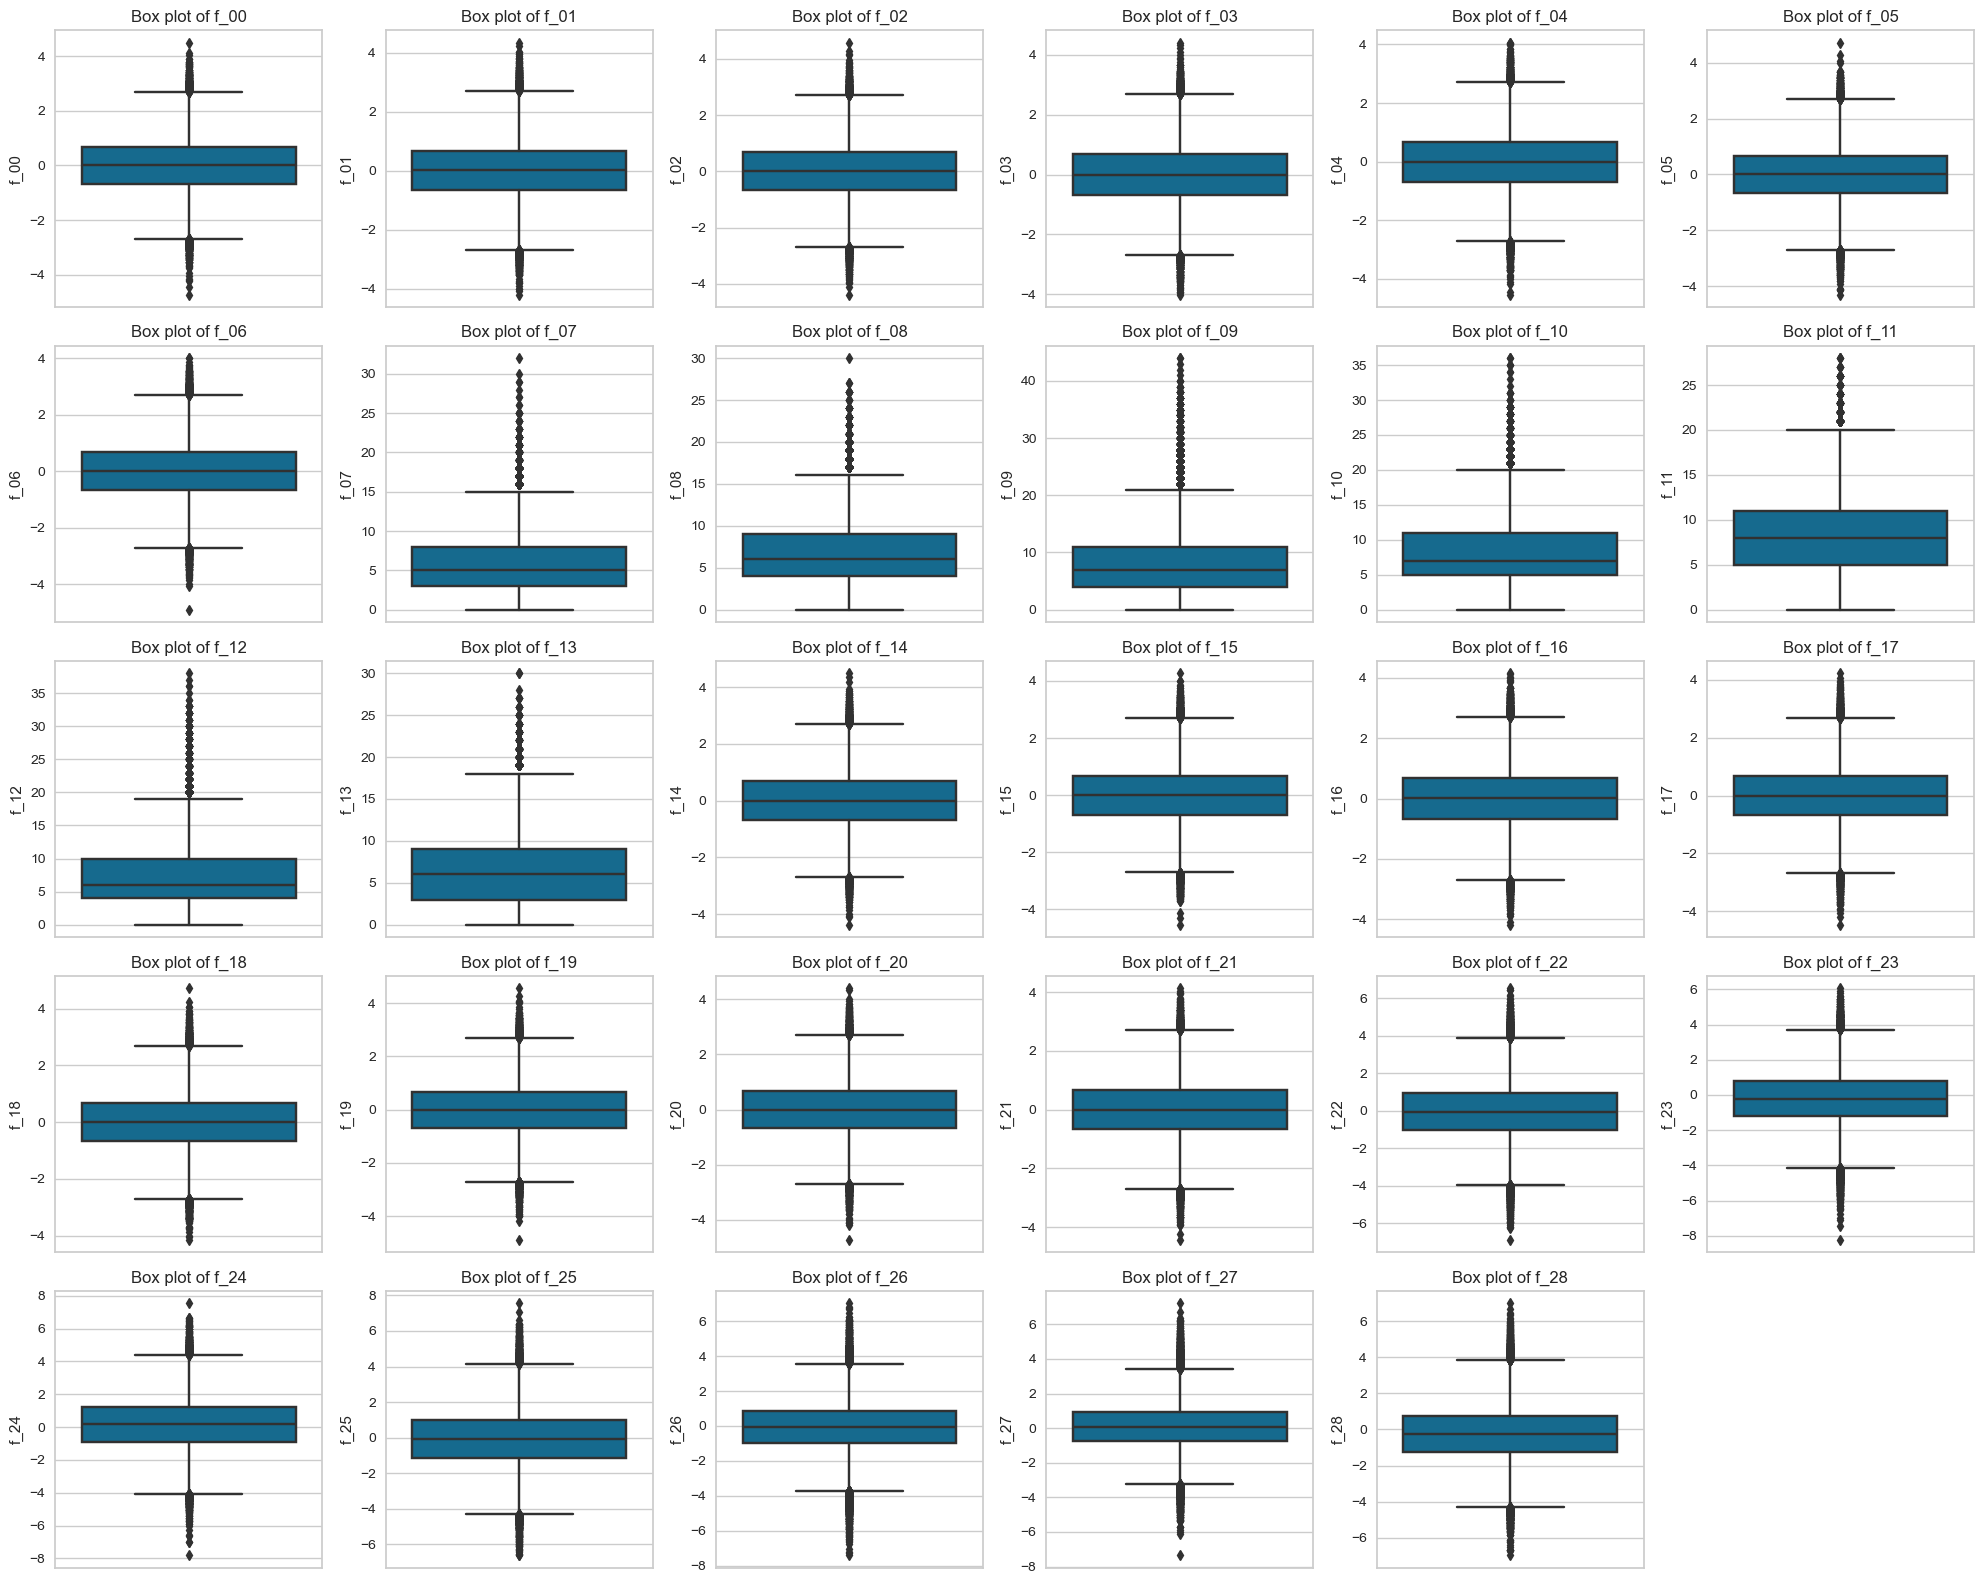

In [12]:
plt.figure(figsize=(20, 16))

for i in range(29):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=df[f'f_{str(i).zfill(2)}'])
    plt.title(f'Box plot of f_{str(i).zfill(2)}')
    plt.tight_layout()

plt.show()

### The box plots reveal several insights regarding outliers in our dataset:

### Presence of Outliers: Most features have numerous outliers, as evidenced by the points located outside the
### "whiskers" of the box plots. These outliers could potentially skew our analyses and models subsequently.

### Varying Ranges of Feature Values: The box plots also highlight the differing ranges of values that each feature
### takes on, confirming what we observed in the histograms. Some features have a compact interquartile range (IQR),
### while others are quite spread out.

### First, we will use a common technique for handling outliers, which is to cap them at a certain percentile.
### This approach involves setting a threshold (usually the 1st and 99th percentiles) and capping all the outliers 
### beyond this range. This method preserves the general distribution and range of the data without the extreme values 
### that can skew analysis. Next, we will apply standard scaling to the data. This process involves transforming the data
### such that each feature has a mean of 0 and a standard deviation of 1, to aid in our clustering models subsequently.

In [15]:
for feature in df.columns[1:]:
    lower_threshold = df[feature].quantile(0.01)  
    upper_threshold = df[feature].quantile(0.99)
    df[feature] = np.where(df[feature] < lower_threshold, lower_threshold, 
                             np.where(df[feature] > upper_threshold, upper_threshold, df[feature]))

scaler = StandardScaler()
scaled_data = df.copy()
scaled_data.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])  # excluding 'id' column for scaling

scaled_data.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.396426,-0.934976,0.661497,0.600208,-0.840673,0.748036,2.307236,-0.972958,1.522420,...,-0.480372,-0.768232,-0.776458,-0.726811,0.930426,-0.694553,0.778994,0.986009,1.075735,0.697620
1,1,-0.700849,-0.467832,0.666811,1.013603,-1.676070,0.880484,-0.089373,-0.972958,-0.912824,...,-0.430054,-0.090839,-1.816597,-0.553406,0.463854,1.054020,-0.136453,-0.568284,0.366208,-1.635390
2,2,0.820439,0.324782,-1.189630,-0.634811,0.110619,0.799234,2.031523,-0.145189,1.035371,...,-0.414582,-1.626658,1.215641,2.284849,0.089475,-1.544048,-0.589583,1.005203,-0.952015,-2.269833
3,3,-0.509638,0.227534,0.269977,0.236355,0.425150,-1.240811,0.144758,0.130734,-1.156348,...,0.632750,1.308139,0.544874,0.743257,-1.245092,0.843080,-1.188862,-0.409062,-0.116845,0.313560
4,4,-0.682593,-1.064012,-0.273558,-1.861930,-0.291286,-1.883320,0.800780,0.682580,0.061274,...,-1.646958,-0.441205,0.330509,0.223304,-1.515992,0.865198,-0.634725,1.197165,-0.396247,-1.172484


### So, outliers have been treated by capping them at the 1st and 99th percentiles.
### This approach retains the overall distribution of each feature while reducing the influence of extreme values.
### Features have also been scaled using standard scaling. 
### This transformation ensures that each feature has a mean of 0 and a standard deviation of 1.

### With the data cleaning done, we will proceed with the last step of EDA - feature engineering.
### As we have no contextual knowledge of the data, we can utilise dimensionality reduction technique like 
### Principal Component Analysis (PCA) to select a subset of principal components that capture the most variance in the data.
### This approach is not exactly feature selection in the traditional sense but serves a similar purpose by reducing the 
### feature space.

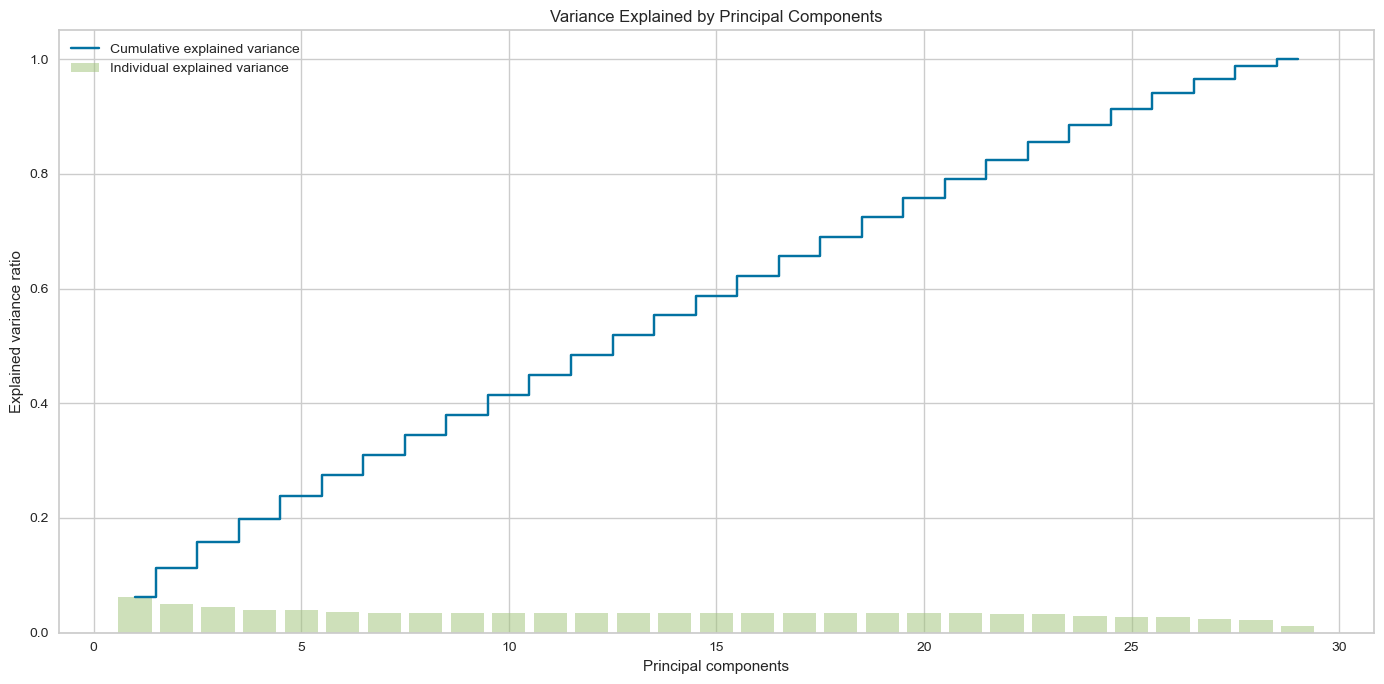

array([0.06298837, 0.11320461, 0.15890036, 0.1990685 , 0.23782171,
       0.27441524, 0.30962085, 0.34469816, 0.37972907, 0.41459272,
       0.44941344, 0.48402328, 0.51857926, 0.55307514, 0.58749656,
       0.62182372, 0.65608889, 0.69016479, 0.72415802, 0.75796233,
       0.79166892, 0.82451681, 0.856303  , 0.88525041, 0.91351296,
       0.94076519, 0.96554843, 0.9880914 , 1.        ])

In [16]:
pca = PCA(n_components=min(*scaled_data.iloc[:, 1:].shape))
principal_components = pca.fit_transform(scaled_data.iloc[:, 1:])

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(14, 7))

plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center',
        label='Individual explained variance', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Cumulative explained variance')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

cumulative_explained_variance

### The chart and data represent the variance explained by each principal component and the cumulative variance explained.

### Individual Explained Variance: Each bar represents the portion of total variance explained by each principal component.
### Cumulative Explained Variance: The step line represents the total variance explained up to each component.
### And we will use it to find the elbow.
### Looking at the cumulative explained variance, we can see that there is no strong presence of very redundant
### features and there is no elbow present for feature selection. While we have no contextual knowledge, it seems that 
### each original feature carries unique information, and therefore, the principal components each explain a portion of 
### the variance. With this, we will continue our analysis with the full set of features that were scaled and removed for
### outliers.

# Models

C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Sahil\anaconda3\Lib\site-packages\sklearn\clust

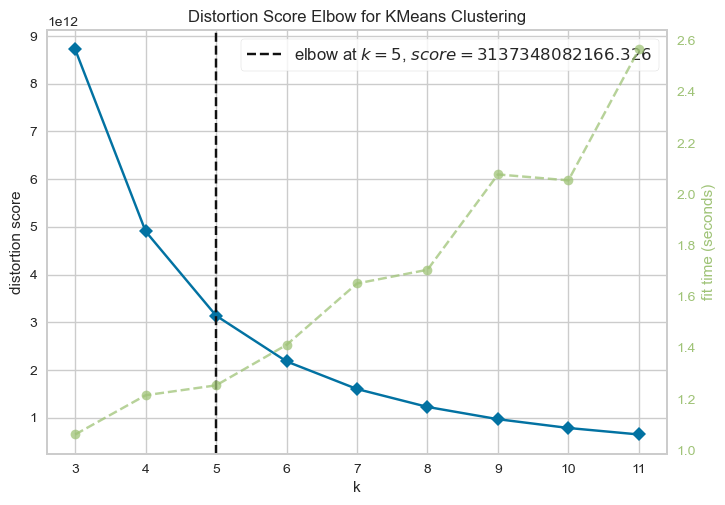

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model,n_init=10, k=(3,12))

visualizer.fit(scaled_data)     
visualizer.show()

###  after k=5, the decrease starts to become more linear, suggesting that increasing the number of clusters beyond this
### doesn't provide much better fitting to the data.

### Another way to validate the number of clusters is by using silhouette analysis, which measures how similar an object
### is to its own cluster compared to other clusters. The silhouette scores range from -1 (incorrect clustering) to
### +1 (highly dense clustering). A high silhouette score indicates that the object is well matched to its own cluster and
### poorly matched to neighboring clusters. We will proceed to apply K-means with K=5 and perform silhouette analysis for
### further validation

In [20]:
km = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = km.fit_predict(scaled_data.iloc[:, 1:])

silhouette_avg = silhouette_score(scaled_data.iloc[:, 1:], clusters)

print("For n_clusters =", 5, "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.036845836183013334


In [33]:
km.inertia_

2543885.163739486

### The silhouette score = 0.03685. This suggests that the data points are on or very close to the decision boundary
### between two neighboring clusters. A score near 0 indicates that clusters are overlapping. Clearly our first model is
### unlikely to do very well in the prediction. We will try to submit this model and see how much ARI can we get with our
### first K-means clustering model.

In [22]:
n_clusters = 5 
init_methods = ['k-means++', 'random']  
random_states = [0, 42, 100]  

results = []

for init in init_methods:
    for random_state in random_states:
        kmeans = KMeans(n_clusters=n_clusters, n_init=10, init=init, random_state=random_state)
        cluster_labels = kmeans.fit_predict(scaled_data.iloc[:, 1:])

        silhouette_avg = silhouette_score(scaled_data.iloc[:, 1:], cluster_labels)
        print(f"For n_clusters {n_clusters}, init {init}, random state {random_state}, "
              f"the average silhouette_score is: {silhouette_avg}")

        results.append({
            'n_clusters': n_clusters,
            'init': init,
            'random_state': random_state,
            'silhouette_score': silhouette_avg
        })
        
results_df = pd.DataFrame(results)

top_results = results_df.sort_values(by="silhouette_score", ascending=False).head(5)
print(top_results)

For n_clusters 5, init k-means++, random state 0, the average silhouette_score is: 0.0368485237365686
For n_clusters 5, init k-means++, random state 42, the average silhouette_score is: 0.036845836183013334
For n_clusters 5, init k-means++, random state 100, the average silhouette_score is: 0.03684767214731511
For n_clusters 5, init random, random state 0, the average silhouette_score is: 0.036846158830759854
For n_clusters 5, init random, random state 42, the average silhouette_score is: 0.03684622333793698
For n_clusters 5, init random, random state 100, the average silhouette_score is: 0.03684725389650676
   n_clusters       init  random_state  silhouette_score
0           5  k-means++             0          0.036849
2           5  k-means++           100          0.036848
5           5     random           100          0.036847
4           5     random            42          0.036846
3           5     random             0          0.036846


# The best model turn out to be the one that we had trained earlier

# DBSCAN

In [23]:
eps_values = [3.9, 4.1, 4.3, 5]
min_samples_value = 500

cluster_results = []

for eps in eps_values:
    model = DBSCAN(eps=eps, min_samples=min_samples_value, metric='euclidean', n_jobs=-1)
    labels = model.fit_predict(scaled_data.iloc[:, 1:])
    
    unique_labels, label_counts = np.unique(labels, return_counts=True)
    
    cluster_results.append({
        'eps': eps,
        'number_of_clusters': len(unique_labels),
        'cluster_sizes': label_counts
    })

for result in cluster_results:
    print(f"\n### DBSCAN with eps value: {result['eps']} ###")
    print(f"Total clusters found: {result['number_of_clusters']}")
    print(f"Sizes of clusters: {result['cluster_sizes']}")


### DBSCAN with eps value: 3.9 ###
Total clusters found: 1
Sizes of clusters: [98000]

### DBSCAN with eps value: 4.1 ###
Total clusters found: 2
Sizes of clusters: [95261  2739]

### DBSCAN with eps value: 4.3 ###
Total clusters found: 2
Sizes of clusters: [74476 23524]

### DBSCAN with eps value: 5 ###
Total clusters found: 2
Sizes of clusters: [ 1787 96213]


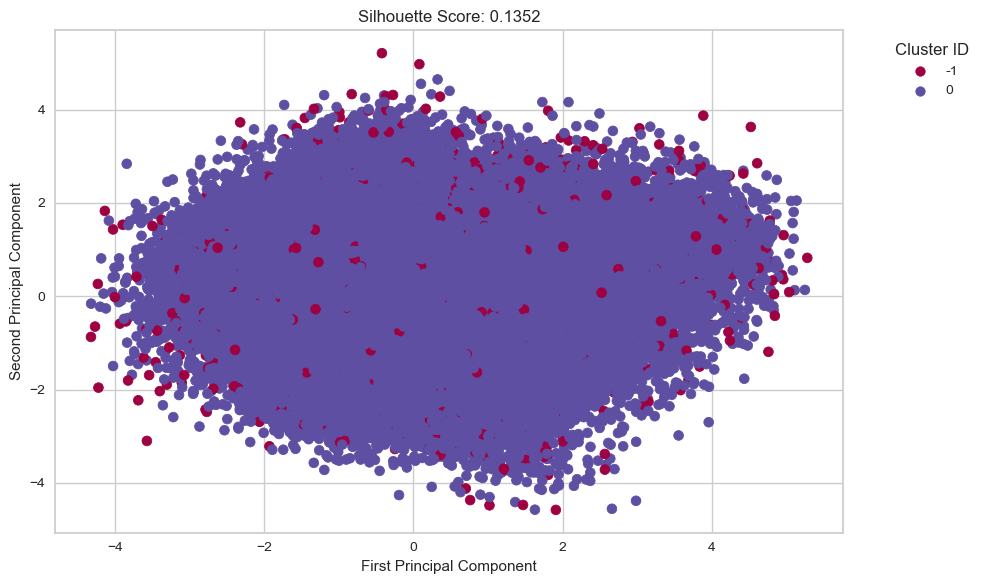

In [24]:
pca_df = pd.DataFrame(data=principal_components, columns=[f'pca_{i}' for i in range(1, principal_components.shape[1] + 1)])

pca_df["dbscan_labels"] = labels

silhouette_avg = silhouette_score(scaled_data.iloc[:, 1:], labels)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="pca_1", y="pca_2", hue="dbscan_labels", palette="Spectral", edgecolor=None)
plt.title(f"Silhouette Score: {silhouette_avg:.4f}")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### We can see that there are not much segregation of clusters. Here, there isnt even much clusters formed (2 only).
### This is likely due to no distinctive shape or region of higher density for DBSCAN to work effectively. 
### On hindsight, this might have been obvious if we have inferred from our earlier PCA analysis

# Gaussian Mixture Model

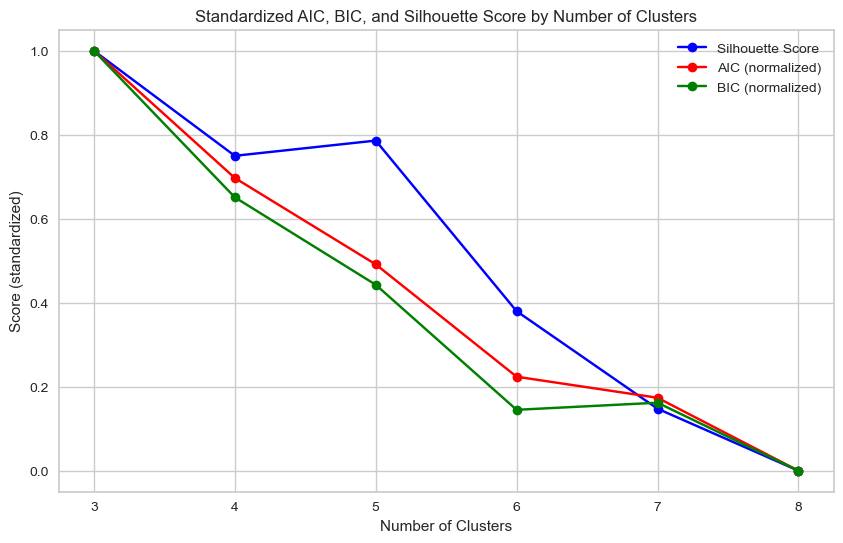

In [25]:
cluster_range = range(3, 9)

sil_scores = []
aic_scores = []
bic_scores = []

all_principal_components = pca.transform(scaled_data.iloc[:, 1:])

for n_clusters in cluster_range:
    gm = GaussianMixture(n_components=n_clusters, random_state=42)
    gm_preds = gm.fit_predict(all_principal_components)
    
    sil = silhouette_score(all_principal_components, gm_preds)
    sil_scores.append(sil)
    
    aic = gm.aic(all_principal_components)
    bic = gm.bic(all_principal_components)
    aic_scores.append(aic)
    bic_scores.append(bic)
    
max_aic, min_aic = max(aic_scores), min(aic_scores)
max_bic, min_bic = max(bic_scores), min(bic_scores)
max_sil, min_sil = max(sil_scores), min(sil_scores)

aic_scores = [(x-min_aic)/(max_aic-min_aic) for x in aic_scores]
bic_scores = [(x-min_bic)/(max_bic-min_bic) for x in bic_scores]
sil_scores = [(x-min_sil)/(max_sil-min_sil) for x in sil_scores]

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, sil_scores, marker='o', label='Silhouette Score', color='blue')
plt.plot(cluster_range, aic_scores, marker='o', label='AIC (normalized)', color='red')
plt.plot(cluster_range, bic_scores, marker='o', label='BIC (normalized)', color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('Score (standardized)')
plt.title('Standardized AIC, BIC, and Silhouette Score by Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

### As seen above, the standardized plot of AIC, BIC, and silhouette score help us to visualise how different metrics can
### aid in decision-making. The AIC and BIC values are typically much larger than silhouette scores, so normalization helps
### in visualizing these metrics together.

### Interestingly, the results with additional scoring criteria changes our perspective on number of clusters.
### As AIC/BIC may be a better scoring measurement of GMM, we can see that the trade-off occur at n=7 when we standardised
### the 3 metrics. Perhaps if we had included these metrics in our k selection in Kmeans clustering, we might have yielded
### better predictions. Nonetheless, we will proceed to fit n=7

In [26]:
optimal_clusters = 7
gm = GaussianMixture(n_components=optimal_clusters, random_state=42)
gm.fit(all_principal_components)  

labels = gm.predict(all_principal_components)

submission_df = pd.DataFrame({
    'ID': scaled_data.index,
    'Predicted': labels
})

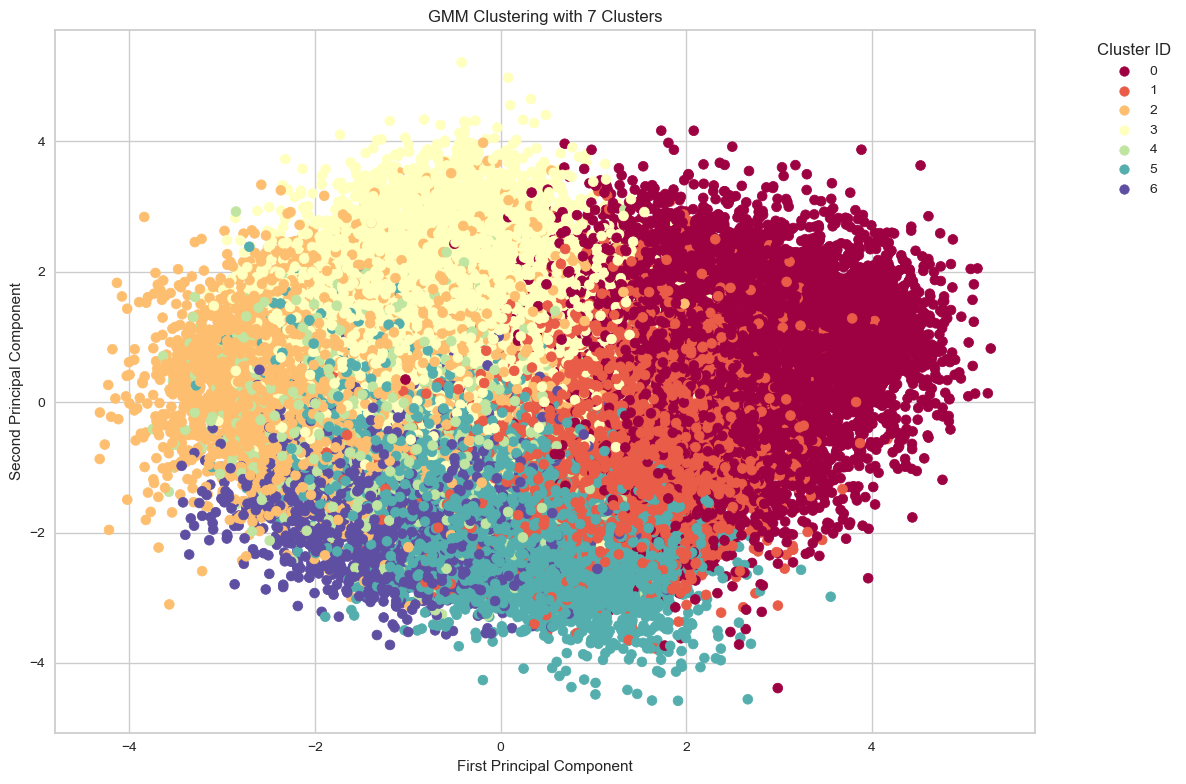

In [27]:
pca_df = pd.DataFrame(all_principal_components, columns=[f"pca_{i+1}" for i in range(all_principal_components.shape[1])])
pca_df['gmm_labels'] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df, x="pca_1", y="pca_2", hue="gmm_labels", palette="Spectral", edgecolor=None)
plt.title(f"GMM Clustering with {optimal_clusters} Clusters")
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.legend(title='Cluster ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kmeans(n=7)

In [30]:
km_7 = KMeans(n_clusters=7, n_init=10, random_state=42)
clusters = km_7.fit_predict(scaled_data.iloc[:, 1:])

silhouette_avg_7 = silhouette_score(scaled_data.iloc[:, 1:], clusters)

print("For n_clusters =", 7, "The average silhouette_score is :", silhouette_avg_7)

For n_clusters = 7 The average silhouette_score is : 0.03345035641299725


In [34]:
print(km_7.inertia_)
print(km.inertia_)

2487229.992053091
2543885.163739486


### Here we can see that the performance of Kmeans with 7 clusters is better than 5, so it is important to consider multiple
### metrics for model selection